In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

## Image Classification Taxonomic Level Comparison

In [2]:
data_path = 'taxon_image_classification_cache/image_classification_evaluation.csv'

In [3]:
df_results = pd.read_csv(data_path, index_col=0)

In [4]:
df_results.head()

,precision,recall,f1-score,support,taxon_level
elephantidae,0.981753,0.969670,0.975674,2275.0,Family
felidae,0.960185,0.975953,0.968005,1705.0,Family
elephas,0.394366,0.912052,0.550639,307.0,Genus
loxodonta,0.982748,0.781504,0.870648,1968.0,Genus
acinonyx,0.936585,0.893023,0.914286,215.0,Genus


### Import Original Dataset

In [6]:
file_path = '../data/processed/'
proboscidia_df = pd.read_csv(file_path + 'proboscidia_train.csv', index_col=0)
felids_df = pd.read_csv(file_path + 'felids_train.csv', index_col=0)

In [7]:
df = pd.concat([proboscidia_df, felids_df])
df = df[df['taxon_species_name'] != 'Felis catus']

In [8]:
df.head()

,observed_on,local_time_observed_at,latitude,longitude,positional_accuracy,public_positional_accuracy,image_url,license,geoprivacy,taxon_geoprivacy,scientific_name,common_name,taxon_id,taxon_kingdom_name,taxon_phylum_name,taxon_class_name,taxon_order_name,taxon_family_name,taxon_genus_name,taxon_species_name
id,,,,,,,,,,,,,,,,,,,,
16344,2007-11-30,2007-11-30 22:52:00+02:00,-17.946449,25.100015,NaN,30699.0,https://inaturalist-open-data.s3.amazonaws.com...,CC-BY,NaN,obscured,Loxodonta africana,Savannah Elephant,43694,Animalia,Chordata,Mammalia,Proboscidea,Elephantidae,Loxodonta,Loxodonta africana
17097,2007-11-16,2007-11-16 20:05:00+02:00,-18.422570,24.012110,NaN,30649.0,https://inaturalist-open-data.s3.amazonaws.com...,CC-BY,NaN,obscured,Loxodonta africana,Savannah Elephant,43694,Animalia,Chordata,Mammalia,Proboscidea,Elephantidae,Loxodonta,Loxodonta africana
17099,2007-11-16,2007-11-17 00:27:00+02:00,-19.196529,23.837842,NaN,30598.0,https://inaturalist-open-data.s3.amazonaws.com...,CC-BY,NaN,obscured,Loxodonta africana,Savannah Elephant,43694,Animalia,Chordata,Mammalia,Proboscidea,Elephantidae,Loxodonta,Loxodonta africana
17110,2007-11-12,2007-11-12 20:23:00+02:00,-13.190468,31.680375,NaN,31045.0,https://inaturalist-open-data.s3.amazonaws.com...,CC-BY,NaN,obscured,Loxodonta africana,Savannah Elephant,43694,Animalia,Chordata,Mammalia,Proboscidea,Elephantidae,Loxodonta,Loxodonta africana
17119,2007-11-12,2007-11-12 23:12:00+02:00,-13.148463,31.648811,NaN,31045.0,https://inaturalist-open-data.s3.amazonaws.com...,CC-BY,NaN,obscured,Loxodonta africana,Savannah Elephant,43694,Animalia,Chordata,Mammalia,Proboscidea,Elephantidae,Loxodonta,Loxodonta africana


In [9]:
def sub_species_detection(x):
    name_count = len(x['scientific_name'].split())
    x['sub_species'] = np.nan
    if name_count >= 3:
        x['sub_species'] = x['scientific_name']
    return x

In [10]:
df = df.apply(lambda x: sub_species_detection(x), axis=1)

## Taxonomic Level

In [30]:
taxonomic_levels = df_results.groupby('taxon_level').agg({'recall': 'mean', 
                                                          'f1-score': 'mean',
                                                          'precision': 'mean'})
taxonomic_levels.head()

,recall,f1-score,precision
taxon_level,,,
Family,0.972812,0.971840,0.970969
Genus,0.696281,0.457102,0.429533
Species,0.346041,0.304666,0.310159
Sub-species,0.433869,0.369647,0.389914


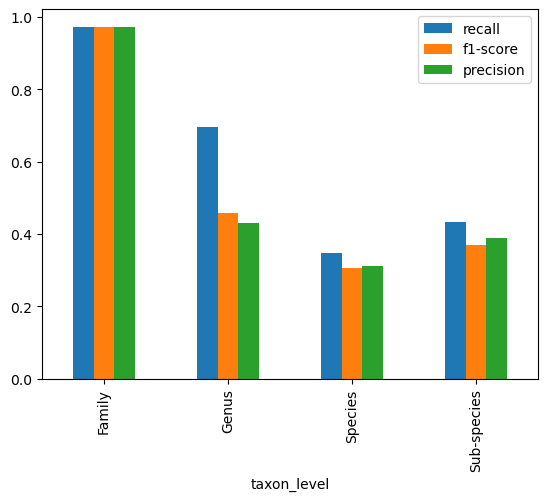

In [31]:
taxonomic_levels.plot(kind='bar')

plt.legend()
plt.show()

### Family Level

In [11]:
family_df = df_results[df_results['taxon_level'] == 'Family'].copy()

In [12]:
family_df.head()

,precision,recall,f1-score,support,taxon_level
elephantidae,0.981753,0.969670,0.975674,2275.0,Family
felidae,0.960185,0.975953,0.968005,1705.0,Family


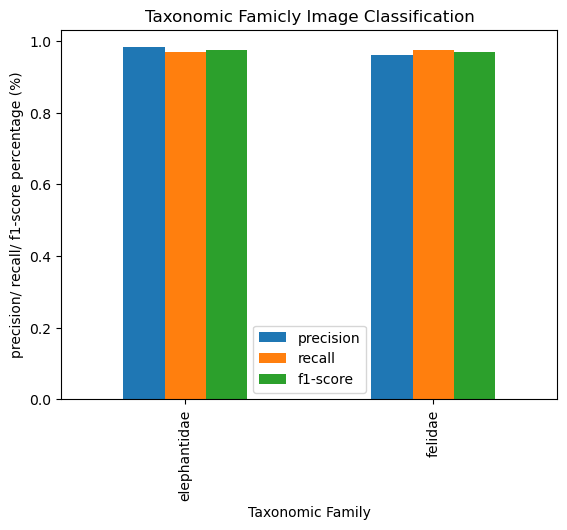

In [13]:
columns = ['precision', 'recall', 'f1-score']
family_df[columns].plot(kind='bar')

plt.title("Taxonomic Famicly Image Classification")
plt.xlabel('Taxonomic Family')
plt.ylabel('precision/ recall/ f1-score percentage (%)')
plt.legend()
plt.show()

In [34]:
family_df = df_results[df_results['taxon_level'] == 'Family'].copy()
family_df = family_df.rename_axis('taxonomic_name').reset_index()

In [32]:
df_orig_family = df.copy()
df_orig_family = df_orig_family.dropna(subset=['taxon_family_name'])

In [35]:
family_df['taxonomic_name'] = family_df['taxonomic_name'].str.capitalize()

In [36]:
order = family_df['taxonomic_name'].unique().tolist()

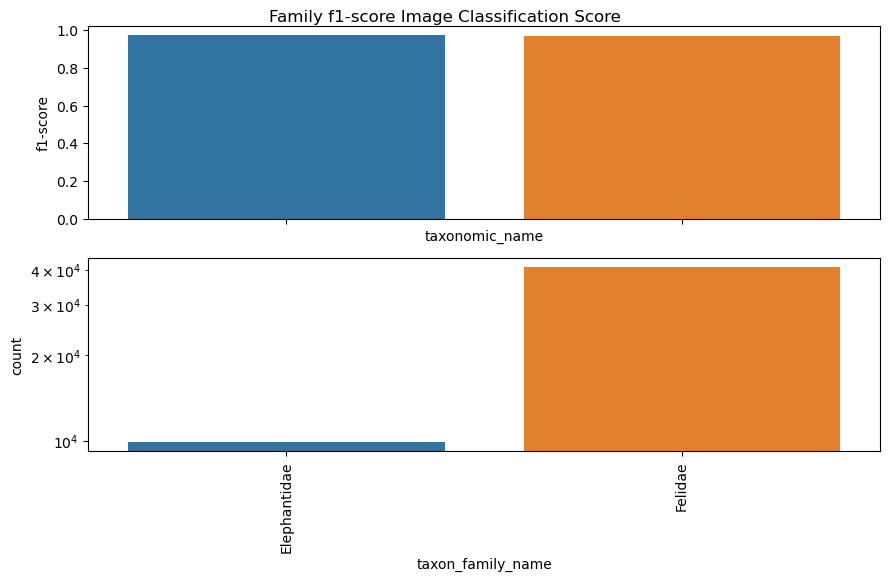

In [37]:
f, axs = plt.subplots(2,1,
                      figsize=(9,5),
                      sharex=True)

h = sns.barplot(data=family_df, x='taxonomic_name', y='f1-score', ax=axs[0], order=order)

g = sns.countplot(x='taxon_family_name', data=df_orig_family, ax=axs[1], order=order)
g.set_yscale('log')

f.tight_layout()

plt.xticks(rotation=90)
f.suptitle('Family f1-score Image Classification Score', y=1)
plt.show()

### Genus Level

In [14]:
genus_df = df_results[df_results['taxon_level'] == 'Genus'].copy()

In [15]:
genus_df = genus_df.rename_axis('taxonomic_name').reset_index()

In [16]:
genus_df.head()

,taxonomic_name,precision,recall,f1-score,support,taxon_level
0,elephas,0.394366,0.912052,0.550639,307.0,Genus
1,loxodonta,0.982748,0.781504,0.870648,1968.0,Genus
2,acinonyx,0.936585,0.893023,0.914286,215.0,Genus
3,caracal,0.269504,0.703704,0.389744,54.0,Genus
4,catopuma,0.000000,0.000000,0.000000,2.0,Genus


Generate Genus data from original dataframe.

In [17]:
df_orig_genus = df.copy()
df_orig_genus = df_orig_genus.dropna(subset=['taxon_genus_name'])

Generate the order to visualize the results in

In [18]:
genus_df['taxonomic_name'] = genus_df['taxonomic_name'].str.capitalize()

In [19]:
order = genus_df['taxonomic_name'].unique().tolist()

Visualize results and data count

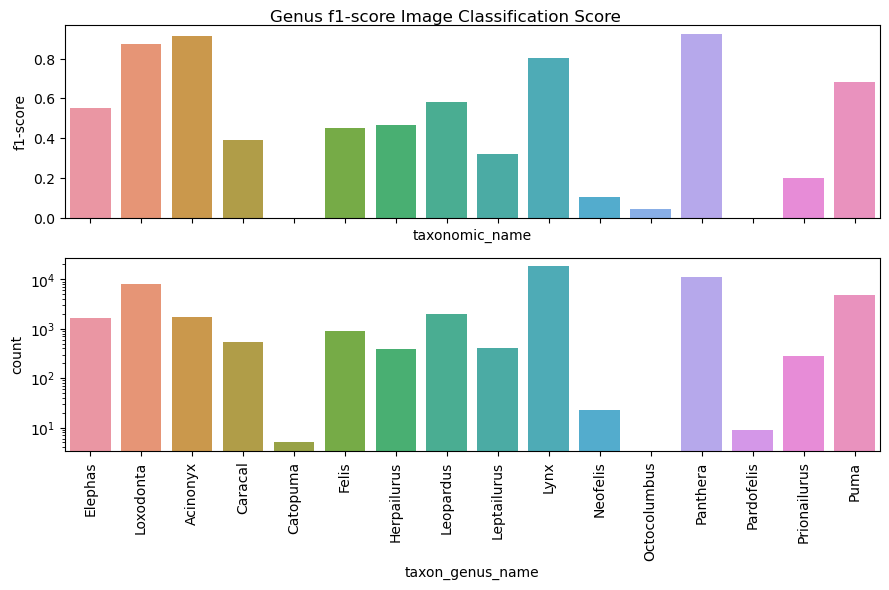

In [20]:
f, axs = plt.subplots(2,1,
                      figsize=(9,5),
                      sharex=True)

h = sns.barplot(data=genus_df, x='taxonomic_name', y='f1-score', ax=axs[0], order=order)

g = sns.countplot(x='taxon_genus_name', data=df_orig_genus, ax=axs[1], order=order)
g.set_yscale('log')

f.tight_layout()

plt.xticks(rotation=90)
f.suptitle('Genus f1-score Image Classification Score', y=1)
plt.show()

### Species Level

In [20]:
species_df = df_results[df_results['taxon_level'] == 'Species'].copy()

In [21]:
species_df = species_df.rename_axis('taxonomic_name').reset_index()

In [22]:
df_orig_species = df.copy()
df_orig_species = df_orig_species.dropna(subset=['taxon_species_name'])

In [23]:
df_orig_species['taxon_species_name'].head()

id
4126     Loxodonta africana
16344    Loxodonta africana
16346    Loxodonta africana
17083    Loxodonta africana
17097    Loxodonta africana
Name: taxon_species_name, dtype: object

In [24]:
species_df['taxonomic_name'] = species_df['taxonomic_name'].str.capitalize()
species_df['taxonomic_name'] = species_df['taxonomic_name'].str.replace("_", " ")

In [25]:
species_df.head()

,taxonomic_name,precision,recall,f1-score,support,taxon_level
0,Loxodonta africana,0.993318,0.895133,0.941673,1993.0,Species
1,Loxodonta cyclotis,0.075221,0.586207,0.133333,29.0,Species
2,Caracal aurata,0.444444,0.800000,0.571429,5.0,Species
3,Caracal caracal,0.977778,0.897959,0.936170,49.0,Species
4,Felis bieti,0.000000,0.000000,0.000000,24.0,Species


In [26]:
order = species_df['taxonomic_name'].unique().tolist()

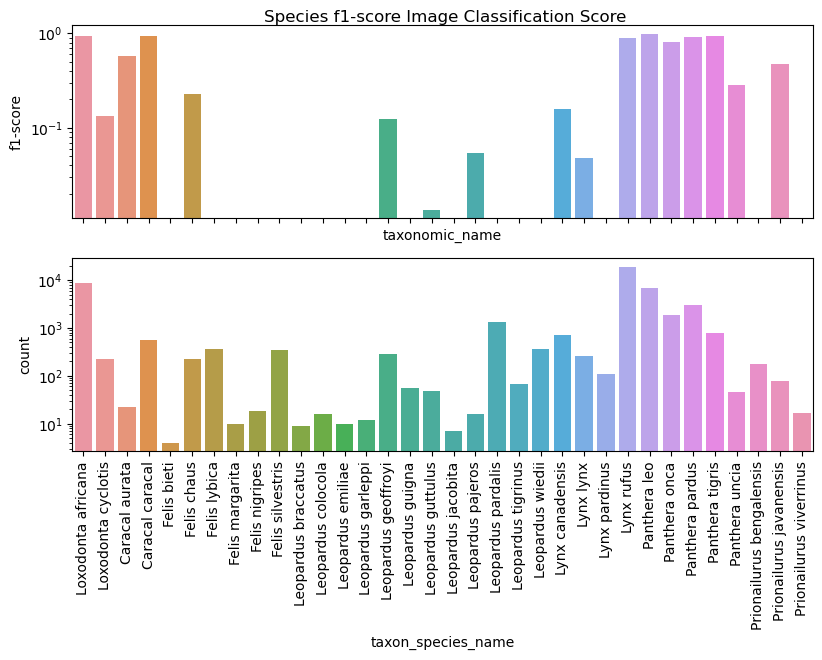

In [27]:
f, axs = plt.subplots(2,1,
                      figsize=(9,5),
                      sharex=True)

h = sns.barplot(data=species_df, x='taxonomic_name', y='f1-score', ax=axs[0], order=order)
h.set_yscale('log')

g = sns.countplot(x='taxon_species_name', data=df_orig_species, ax=axs[1], order=order)
g.set_yscale('log')

f.tight_layout()

plt.xticks(rotation=90)
f.suptitle('Species f1-score Image Classification Score', y=1)
plt.show()

### Sub-species Level

In [56]:
sub_species_df = df_results[df_results['taxon_level'] == 'Sub-species'].copy()

In [57]:
sub_species_df = sub_species_df.rename_axis('taxonomic_name').reset_index()

In [58]:
df_orig_subspecies = df.copy()
df_orig_subspecies = df_orig_subspecies.dropna(subset=['taxon_species_name'])

In [59]:
sub_species_df['taxonomic_name'] = sub_species_df['taxonomic_name'].str.capitalize()
sub_species_df['taxonomic_name'] = sub_species_df['taxonomic_name'].str.replace("_", " ")

In [60]:
order = sub_species_df['taxonomic_name'].unique().tolist()

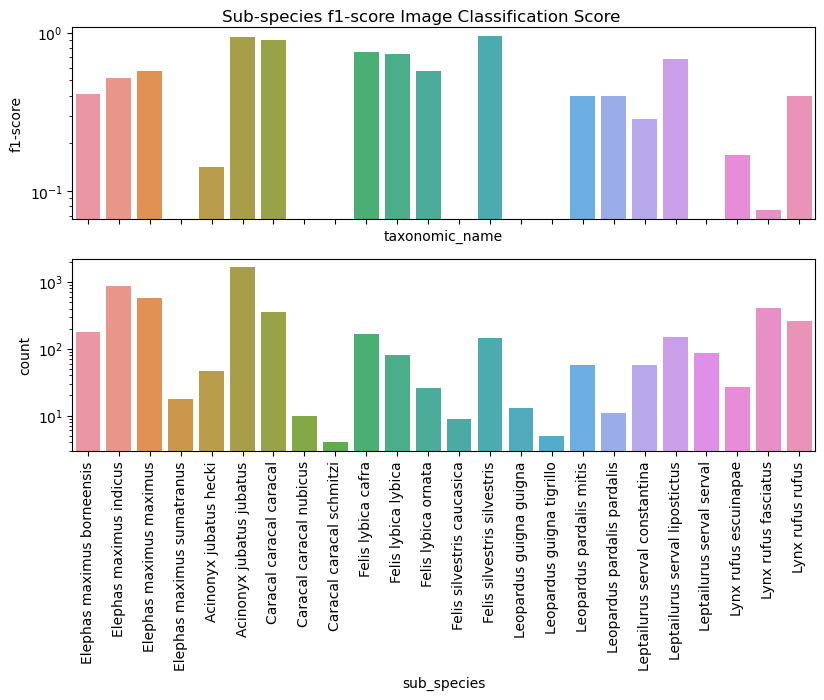

In [61]:
f, axs = plt.subplots(2,1,
                      figsize=(9,5),
                      sharex=True)

h = sns.barplot(data=sub_species_df, x='taxonomic_name', y='f1-score', ax=axs[0], order=order)
h.set_yscale('log')

g = sns.countplot(x='sub_species', data=df_orig_subspecies, ax=axs[1], order=order)
g.set_yscale('log')

f.tight_layout()

plt.xticks(rotation=90)
f.suptitle('Sub-species f1-score Image Classification Score', y=1)
plt.show()